In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [17]:
data=100
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
m2=-1
lam=1
c_reg1=0.03
c_reg2=0

<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([1.94424703, 0.51404748, 0.72221688, 0.83943883, 3.24671707,
       2.68559385, 2.52295462, 4.35418193, 4.70321603, 9.69973005])>
tf.Tensor(
[ 3.01490951  3.02722263  3.04978824  3.09134316  3.16854751  3.31437385
  3.59861219  4.18820179  5.58607614 10.29821491], shape=(10,), dtype=float64)


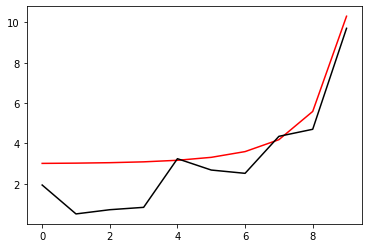

In [18]:
h=tf.zeros(layer)
h_in=[]
#h_in=[3.0205426, 3.022307 , 3.0291433, 3.04402  , 3.0732646, 3.131582 ,
# 3.2585216, 3.5762587, 4.59116  , 9.752249]
for i in range (layer):
#   midd=np.float64(10.0)
#    h_in.append(midd)
#    midd=3*coth(3*((i-layer)*dn)).numpy()
#    h_in.append(midd)
    mu=1/(1-i/10)
    h_inn=np.float64(np.random.normal(mu, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
print(h)

h_real=tf.zeros(layer)
middd=[]
for i in range (layer):
    midd=3*coth(3*((i-layer)*dn)).numpy()
    middd.append(midd)
h_real=tf.constant(middd)
print(h_real)
plt.plot(h_real, 'r-')
plt.plot(h.numpy(), 'k-')
plt.show()

In [19]:
m2=tf.constant(np.float64(-1.0))
m2_2=tf.Variable(np.float64(np.random.uniform(-1.5, -0.5)))
print(m2_2)

lam=tf.constant(np.float64(1.0))
lam2=tf.Variable(np.float64(np.random.uniform(0.5, 1.5)))
print(lam2)

<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-1.0505263424896218>
<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.2276016032907522>


In [6]:
def F_func(m, la, a,b):
    return 2*b/n_fin-m*a-la*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [7]:
def LP2(hh, m, la, phi, pi):
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m*dn+(1-dn*hh[j])*pi+dn*la*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_p(hh, m, la):
    Positive=[]
    while len(Positive)<data:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, m, la, phi1, pi1)
        for i in range (10000):
            if len(Positive)>=100: break
            if tf.math.abs(F_func(m, la, phi_1[i], pi_1[i]))<0.1: Positive.append([phi1[i], pi1[i]]), print(len(Positive))
            else: continue
    return Positive
def NN_func_n(hh, m, la):
    Negative=[]
    while len(Negative)<data:
        phi1=np.random.uniform(0.0, 1.5, 200)
        pi1=np.random.uniform(-0.2, 0.2, 200)
        phi_1, pi_1 = LP2(hh, m, la, phi1, pi1)
        for i in range (200):
            if len(Negative)>=100: break
            if tf.math.abs(F_func(m, la, phi_1[i], pi_1[i]))>=0.1: Negative.append([phi1[i], pi1[i]])
            else: continue
    return Negative
def NN_func_01(hh, m, la, list1):
    PP=[]
    NN=[]
    for i in range (data):
        phi=list1[i][0]
        pi=list1[i][1]
        if tf.math.abs(LP2(hh, m, la, phi, pi)[1])<0.1: PP.append([phi, pi])
        else: NN.append([phi, pi])
    return PP, NN

In [8]:
Positive=NN_func_p(h_real, m2, lam)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [9]:
Negative=NN_func_n(h_real, m2, lam)

In [20]:
[Positive0, Positive1]=NN_func_01(h, m2_2, lam2, Positive)
[Negative0, Negative1]=NN_func_01(h, m2_2, lam2, Negative)

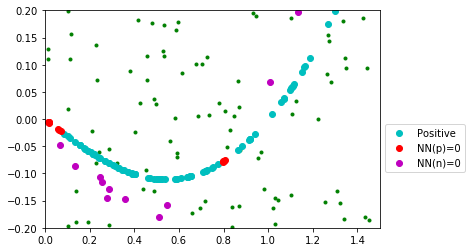

In [21]:
x_data1=[v[0] for v in Positive0]
y_data1=[v[1] for v in Positive0]
x_data2=[v[0] for v in Positive1]
y_data2=[v[1] for v in Positive1]
x_data3=[v[0] for v in Negative0]
y_data3=[v[1] for v in Negative0]
x_data4=[v[0] for v in Negative1]
y_data4=[v[1] for v in Negative1]
plt.plot(x_data4, y_data4, 'g.')
plt.plot(x_data2, y_data2, 'co', label='Positive')
plt.plot(x_data1, y_data1, 'ro', label='NN(p)=0')
plt.plot(x_data3, y_data3, 'mo', label='NN(n)=0')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [22]:
def Error_func(hh, m, la):
    phi0=np.array([v[0] for v in Positive])
    pi0=np.array([v[1] for v in Positive])
    phi1=np.array([v[0] for v in Negative])
    pi1=np.array([v[1] for v in Negative])
    phi_0, pi_0=LP2(hh, m, la, phi0, pi0)
    phi_1, pi_1=LP2(hh, m, la, phi1, pi1)
    PPlist=t_func(pi_0)
    NNlist=t_func(pi_1)
    sum_p=sum(PPlist)
    sum_n=data-sum(NNlist)

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return E_reg1+E_reg2+sum_p+sum_n

In [23]:
print(Error_func(h_real, m2, lam))
print(Error_func(h, m2_2, lam2))

tf.Tensor(2.8833815255032227, shape=(), dtype=float64)
tf.Tensor(99.09067337864123, shape=(), dtype=float64)


In [24]:
def run():
    with tf.GradientTape() as g:
        loss=Error_func(h, m2_2, lam2) #돌리기전에 Error함수 수정 잊지말것
        gradients=g.gradient(loss, [h, m2_2, lam2])
    optimizer.apply_gradients(zip(gradients, [h, m2_2, lam2]))

100 91.33993080977052 -0.9824067731822382 1.172721408549135
[2.02060619 0.59169401 0.79978631 0.91689499 3.32200506 2.75849779
 2.58942589 4.40292949 4.70181779 9.60031889]


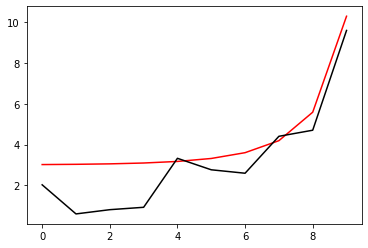

200 86.52672014274886 -0.9401908399189067 1.0999974601992448
[2.07609758 0.64978012 0.85706263 0.97274108 3.37017824 2.79583696
 2.59769736 4.34972573 4.6051421  9.50048873]


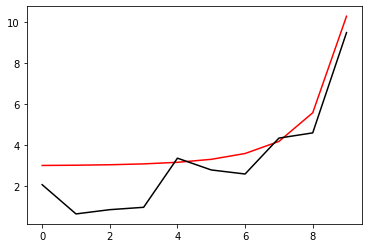

300 82.3789597809271 -0.8988964747515655 1.0369896184357832
[2.14137656 0.72280937 0.93636857 1.0603306  3.46782607 2.90685114
 2.7210102  4.46674922 4.69293769 9.40249692]


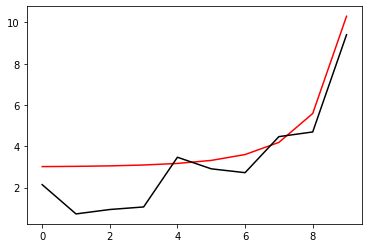

400 36.541710738567055 -0.7905047420542974 0.980564869894212
[2.23277837 0.81644945 1.02833863 1.14660028 3.53674764 2.94092134
 2.6760029  4.34339494 4.5441409  9.30491578]


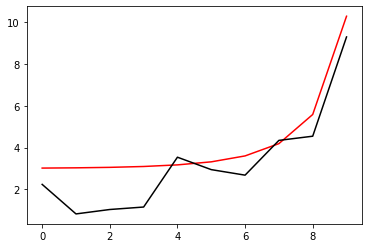

500 36.44949424595973 -0.7928688628329698 0.98454606225394
[2.22425833 0.81039831 1.02089829 1.13936124 3.5247935  2.927333
 2.65747366 4.32670154 4.53233142 9.20695679]


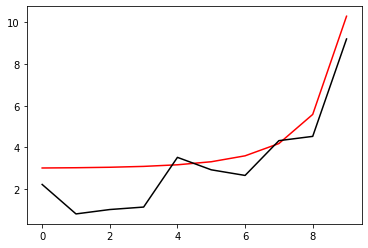

600 36.44350340415456 -0.7924804262914502 0.9844943458862847
[2.22083796 0.80984622 1.01904909 1.13812001 3.51912755 2.9209471
 2.64579382 4.31301034 4.52096549 9.11012054]


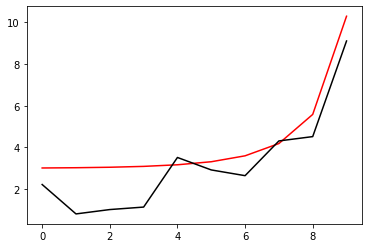

700 36.4383267672164 -0.7918952283253308 0.9840183070016183
[2.21761311 0.80984397 1.01766639 1.13752454 3.51385227 2.91528986
 2.6347788  4.29945436 4.50949316 9.01426898]


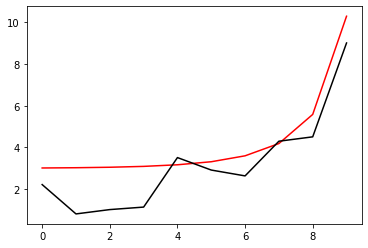

800 36.43377995997618 -0.7913109980803865 0.9835259352541156
[2.21419903 0.81000202 1.01635877 1.13718796 3.50860013 2.91006034
 2.62434367 4.28625419 4.49825361 8.91931733]


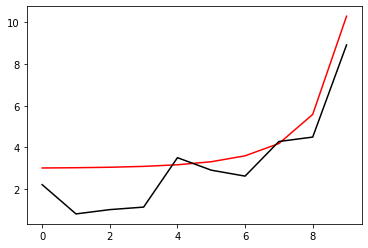

900 36.42987276481854 -0.7907443234368255 0.9830387538217282
[2.21059761 0.81032563 1.01514089 1.13713993 3.50343641 2.90538851
 2.61472227 4.27365644 4.48745283 8.82521127]


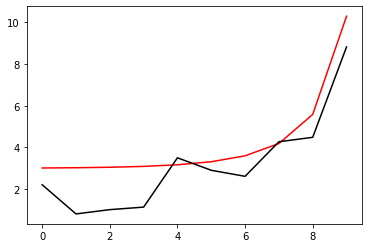

1000 36.426562721923666 -0.7902050156684265 0.9825664577485853
[2.20681409 0.81082525 1.01403041 1.13741071 3.49841673 2.90138075
 2.60609724 4.26184584 4.47724223 8.73191427]


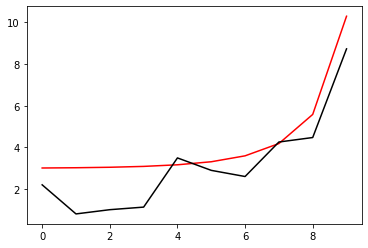

1100 36.42377369329647 -0.7897004674630117 0.982117007678462
[2.20284807 0.8115068  1.01303813 1.13802076 3.49357681 2.89810963
 2.59859356 4.25094681 4.46772376 8.63940112]


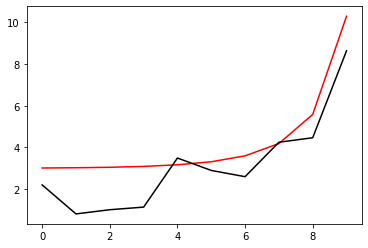

1200 36.4214124224793 -0.789235648636262 0.9816963996675822
[2.19869475 0.81237246 1.01216901 1.13898184 3.48893462 2.89561694
 2.59228357 4.24102884 4.45895421 8.54765396]


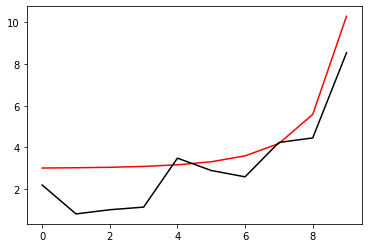

1300 36.419381748367826 -0.788813182046238 0.9813085065795648
[2.19434601 0.81342158 1.01142323 1.14029837 3.48449276 2.89391747
 2.58719318 4.23211296 4.45095044 8.45665979]


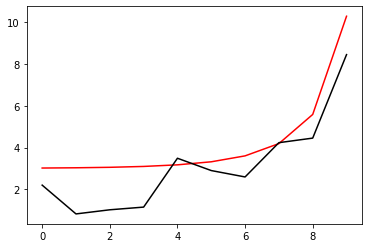

1400 36.41759003764471 -0.7884335397627169 0.9809551021967063
[2.18979126 0.81465137 1.01079729 1.14196882 3.48024113 2.89300337
 2.58330899 4.22417908 4.44369528 8.36640867]


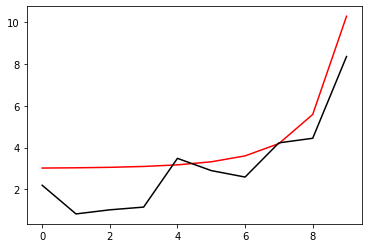

1500 36.415956981978354 -0.7880953373218829 0.9806360449840575
[2.18501813 0.81605761 1.01028495 1.14398711 3.47615949 2.89284858
 2.58058583 4.21717379 4.43714395 8.27689255]


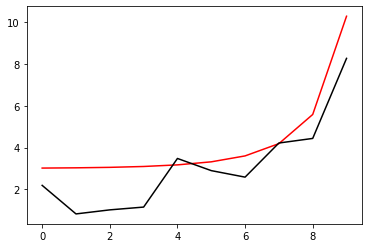

1600 36.41441629727014 -0.7877956943261422 0.9803495787048152
[2.18001301 0.81763518 1.00987808 1.1463439  3.47221999 2.89341342
 2.5789545  4.21101825 4.43123056 8.18810437]


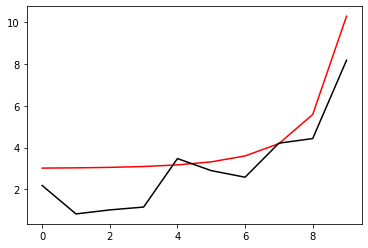

1700 36.41291606293166 -0.7875306268641655 0.9800927007725937
[2.17476143 0.8193785  1.00956747 1.14902787 3.46838964 2.89464898
 2.57832935 4.20561608 4.42587451 8.1000375 ]


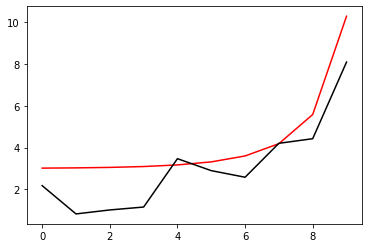

1800 36.41141748449558 -0.7872954389404914 0.9798615519168206
[2.16924842 0.82128194 1.00934343 1.15202676 3.46463249 2.89650124
 2.57861542 4.20086065 4.42098658 8.01268533]


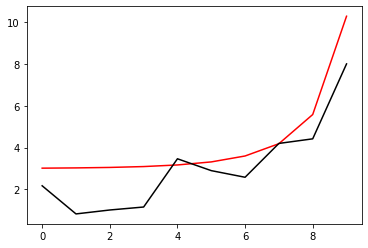

1900 36.40989279426122 -0.7870850848671136 0.9796517885742243
[2.16345872 0.82334008 1.00919645 1.15532842 3.46091162 2.89891473
 2.57971485 4.19664169 4.41647432 7.92604104]


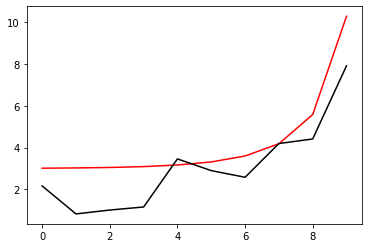

2000 36.40832286343373 -0.7868944813793919 0.9794589097042871
[2.15737698 0.82554799 1.00911761 1.15892154 3.45719074 2.9018356
 2.58153223 4.19285081 4.41224663 7.84009757]


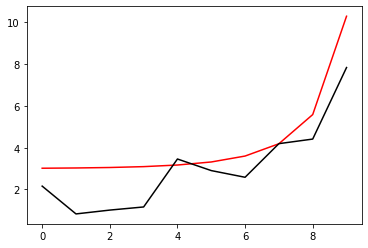

2100 36.40669492562919 -0.7867187561266515 0.97927852059835
[2.1509879  0.82790138 1.00909899 1.16279632 3.45343553 2.90521402
 2.58397889 4.18938588 4.4082173  7.75484756]


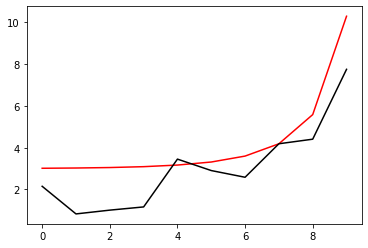

2200 36.40500064151029 -0.7865534271312671 0.979106526369781
[2.14427636 0.83039672 1.00913389 1.16694487 3.4496145  2.90900583
 2.58697589 4.18615412 4.40430759 7.6702835 ]


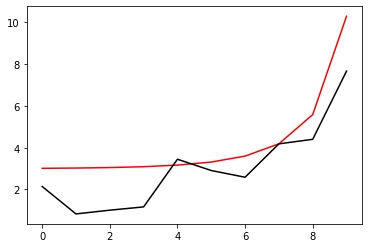

2300 36.40323459373123 -0.7863945148724705 0.9789392562429939
[2.13722744 0.83303125 1.00921702 1.17136145 3.44569959 2.91317358
 2.59045579 4.18307393 4.40044774 7.58639785]


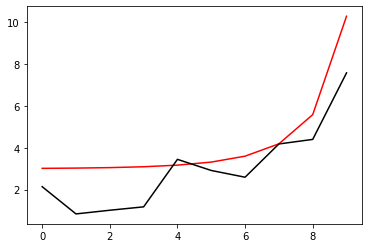

2400 36.40139320323084 -0.7862385941563211 0.9787735259739351
[2.12982646 0.83580303 1.00934454 1.17604255 3.44166634 2.91768691
 2.59436345 4.18007574 4.39657764 7.5031832 ]


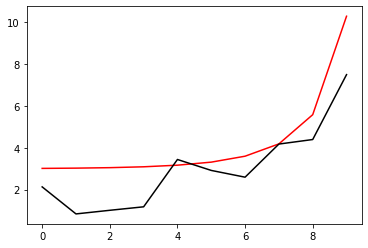

2500 36.39947400270602 -0.7860827965508792 0.9786066495972566
[2.12205895 0.8387108  1.00951404 1.18098684 3.43749392 2.92252239
 2.59865583 4.17710179 4.39264665 7.42063245]


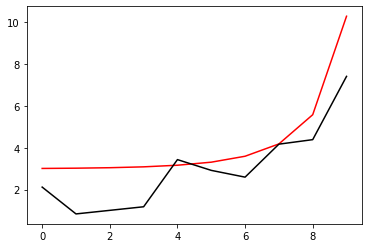

2600 36.39747518273569 -0.7859247758935126 0.9784364133908808
[2.1139107  0.84175395 1.00972451 1.186195   3.43316485 2.92766306
 2.60330121 4.17410535 4.38861298 7.33873896]


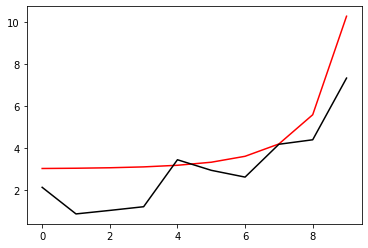

2700 36.39539532880674 -0.7857626494582359 0.9782610248743295
[2.1053676  0.84493237 1.00997616 1.19166945 3.42866469 2.93309763
 2.60827793 4.17104946 4.38444263 7.25749671]


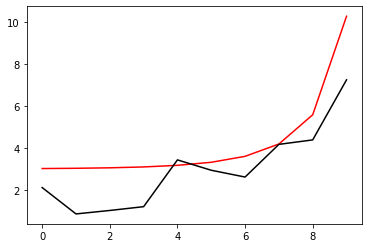

2800 36.39323328216427 -0.7855949261911871 0.9780790483085218
[2.09641572 0.84824629 1.01027035 1.19741415 3.42398157 2.93881966
 2.61357293 4.16790542 4.38010819 7.17690043]


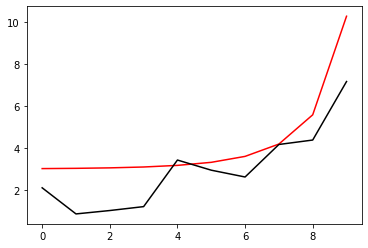

2900 36.39098807550569 -0.7854204314211948 0.9778893360428751
[2.08704117 0.85169619 1.01060945 1.20343428 3.41910578 2.94482656
 2.61918019 4.16465122 4.37558751 7.09694566]


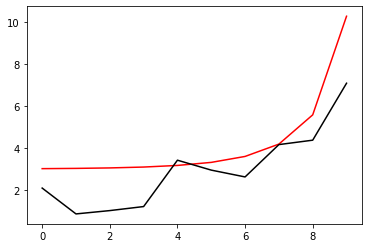

3000 36.38865891100154 -0.78523823505463 0.9776909626065606
[2.07723014 0.85528262 1.01099669 1.20973595 3.41402935 2.95111878
 2.62509931 4.1612701  4.37086251 7.01762884]


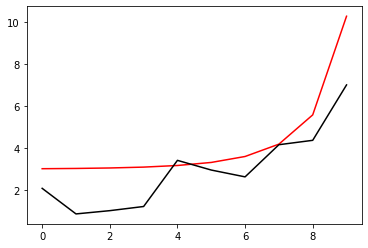

3100 36.38624516079332 -0.7850475878338825 0.9774831660217033
[2.06696882 0.8590061  1.01143607 1.216326   3.40874568 2.95769902
 2.63133422 4.1577492  4.36591814 6.93894733]


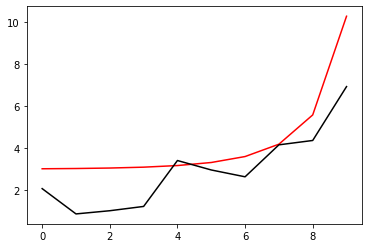

3200 36.383746378748256 -0.7848478680537818 0.9772652986818939
[2.05624345 0.86286699 1.0119323  1.22321181 3.4032493  2.96457152
 2.63789207 4.15407852 4.36074143 6.86089947]


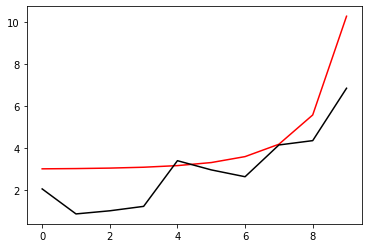

3300 36.38116231755328 -0.7846385393674044 0.9770367884417823
[2.04504028 0.86686538 1.0124907  1.23040103 3.39753557 2.97174159
 2.6447824  4.15025002 4.3553208  6.7834845 ]


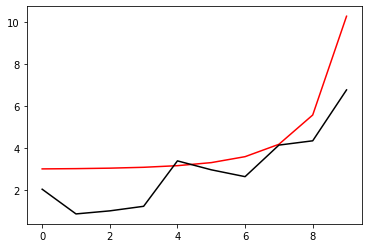

3400 36.37849294820328 -0.7844191190511772 0.9767971093614788
[2.03334565 0.87100099 1.01311719 1.23790156 3.39160062 2.97921513
 2.65201648 4.14625698 4.34964553 6.70670262]


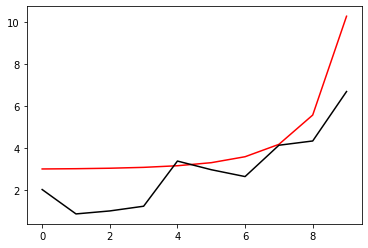

3500 36.37573848045404 -0.7841891553332982 0.9765457608251692
[2.02114598 0.87527311 1.01381826 1.24572132 3.3854412  2.98699835
 2.65960684 4.14209355 4.3437054  6.63055493]


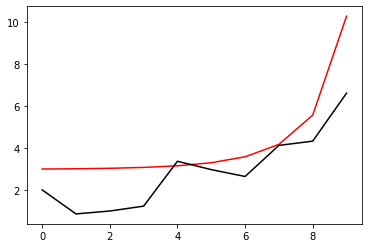

3600 36.372899383513754 -0.7839482120506522 0.9762822534342445
[2.00842783 0.87968049 1.01460096 1.25386823 3.37905467 2.99509753
 2.6675669  4.13775447 4.33749036 6.55504339]


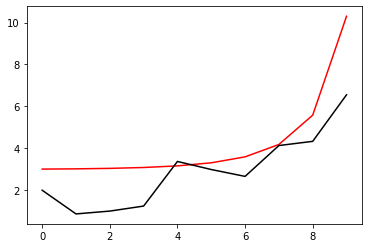

3700 36.369976406535685 -0.7836958588828439 0.9760061000586765
[1.995178   0.88422126 1.01547291 1.26235009 3.37243901 3.00351882
 2.6759108  4.13323479 4.33099044 6.48017081]


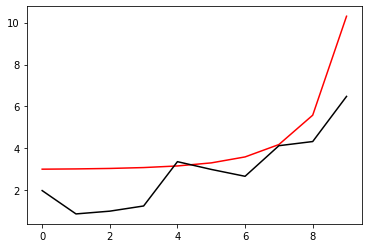

3800 36.36697059856833 -0.7834316656025451 0.9757168106068539
[1.98138357 0.88889288 1.01644231 1.27117455 3.36559282 3.01226811
 2.68465322 4.12852989 4.32419561 6.40594079]


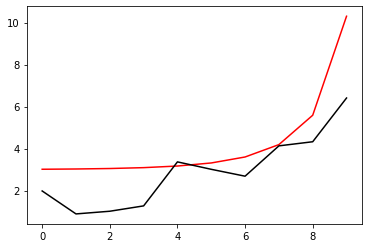

3900 36.36388332763722 -0.7831551990746628 0.9754138893455734
[1.96703198 0.89369206 1.01751794 1.28034898 3.35851536 3.02135093
 2.69380926 4.12363531 4.31709575 6.33235768]


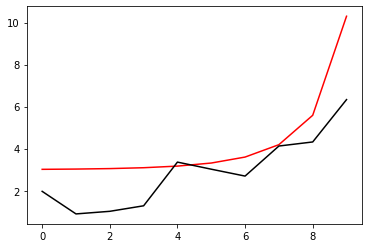

4000 36.36071629861543 -0.7828660220521032 0.9750968338932688
[1.95211114 0.89861467 1.0187092  1.28988045 3.35120667 3.03077237
 2.70339439 4.1185468  4.30968062 6.25942656]


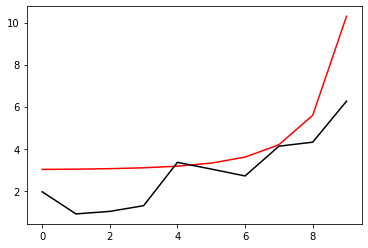

4100 36.35747156951712 -0.7825636931008783 0.974765135272499
[1.93660949 0.90365567 1.02002609 1.29977568 3.3436676  3.04053696
 2.71342442 4.11326033 4.30193986 6.18715317]


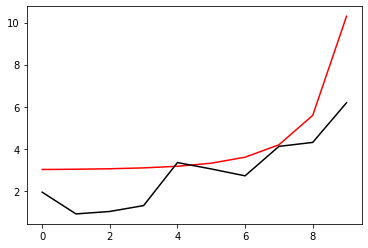

4200 36.35415156582638 -0.7822477672160549 0.9744182786183705
[1.92051616 0.90880905 1.02147927 1.31004095 3.3358999  3.05064862
 2.72391536 4.10777209 4.29386299 6.11554387]


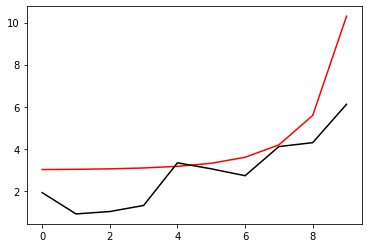

4300 36.35075909245311 -0.7819177968567582 0.9740557442927298
[1.90382099 0.91406772 1.02308003 1.32068202 3.32790629 3.06111057
 2.73488348 4.10207855 4.28543946 6.04460561]


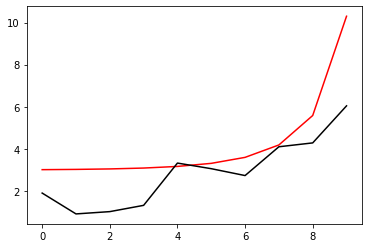

4400 36.34729734289809 -0.7815733332397491 0.9736770092558616
[1.88651473 0.91942348 1.02484029 1.33170414 3.31969061 3.07192528
 2.74634517 4.09617649 4.27665865 5.97434587]


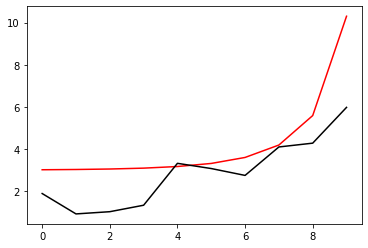

4500 36.34376990520446 -0.7812139277992397 0.9732815486094478
[1.86858909 0.9248669  1.02677263 1.34311188 3.31125785 3.08309435
 2.75831691 4.09006305 4.26750987 5.90477261]


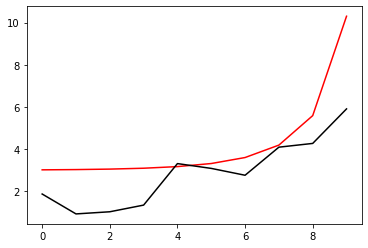

4600 36.34018076428151 -0.7808391337585301 0.9728688372586389
[1.85003686 0.93038728 1.02889025 1.35490915 3.30261427 3.09461845
 2.77081523 4.08373578 4.25798246 5.83589425]


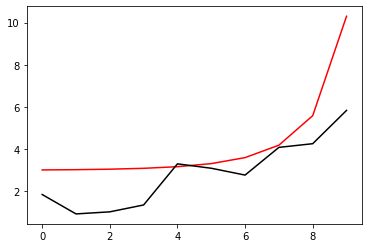

4700 36.33653430020594 -0.7804485077777205 0.9724383516574183
[1.83085207 0.93597255 1.03120698 1.3670991  3.29376751 3.10649726
 2.78385661 4.0771927  4.24806575 5.76771954]


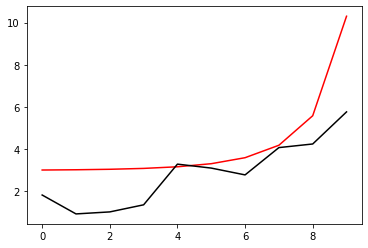

4800 36.33283528213963 -0.7800416116491816 0.9719895716074144
[1.81103007 0.94160923 1.0337372  1.37968403 3.28472668 3.11872939
 2.79745737 4.07043237 4.23774914 5.7002576 ]


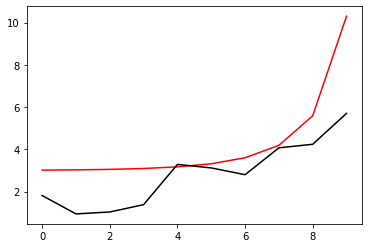

4900 36.329088857551774 -0.7796180140139388 0.971521982080754
[1.79056765 0.94728234 1.03649586 1.39266539 3.27550244 3.13131228
 2.81163366 4.06345391 4.22702211 5.63351775]


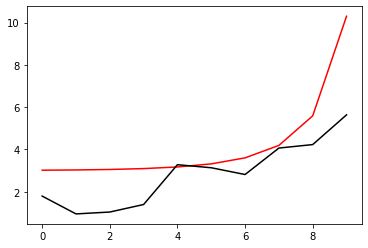

5000 36.325300536497515 -0.7791772920707547 0.9710350750354568
[1.76946318 0.95297537 1.03949839 1.40604365 3.26610714 3.1442422
 2.82640129 4.05625714 4.21587427 5.56750954]


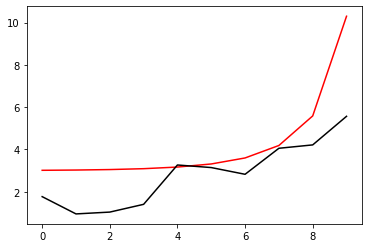

5100 36.32147617078788 -0.7787190332472967 0.9705283511888319
[1.74771669 0.95867024 1.04276061 1.41981828 3.25655486 3.1575141
 2.84177566 4.04884259 4.20429539 5.50224261]


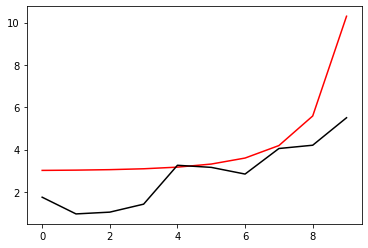

5200 36.317621927980824 -0.7782428368002536 0.970001321711325
[1.72532999 0.96434724 1.04629872 1.4339877  3.24686155 3.17112165
 2.85777164 4.04121159 4.19227546 5.43772665]


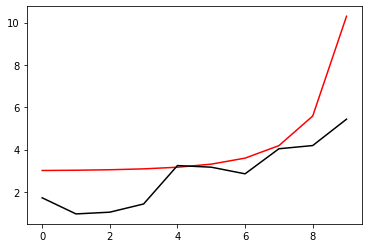

5300 36.31374426023834 -0.7777483153092163 0.9694535098008352
[1.70230678 0.96998501 1.05012912 1.44854922 3.23704507 3.18505713
 2.87440343 4.03336638 4.17980471 5.37397128]


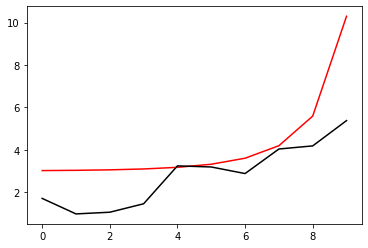

5400 36.30984986821735 -0.7772350960278913 0.968884452096032
[1.67865272 0.97556059 1.05426832 1.46349901 3.22712529 3.19931142
 2.89168447 4.02531016 4.16687367 5.310986  ]


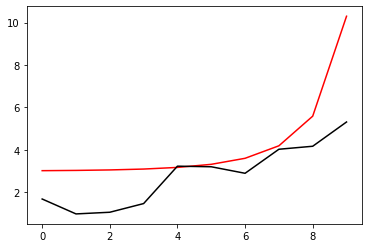

5500 36.30594566029916 -0.7767028220560566 0.9682936998870291
[1.65437552 0.98104933 1.05873281 1.47883206 3.21712416 3.21387398
 2.90962726 4.01704718 4.15347322 5.24878006]


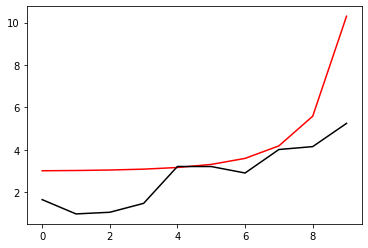

5600 36.302038707602456 -0.7761511532968097 0.9676808200831167
[1.629485   0.98642502 1.06353888 1.49454215 3.20706577 3.22873285
 2.92824324 4.00858286 4.13959463 5.18736237]


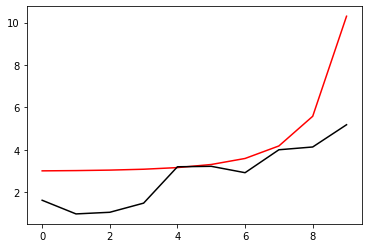

5700 36.2981361953665 -0.7755797671663315 0.9670453959004167
[1.60399318 0.99165989 1.06870243 1.51062186 3.19697636 3.24387466
 2.94754263 3.99992383 4.12522959 5.12674137]


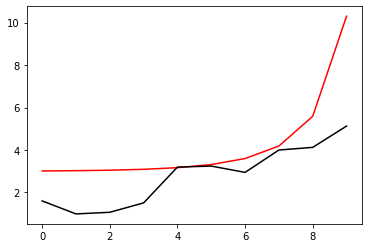

5800 36.294245371429014 -0.7749883590276709 0.9663870272374644
[1.57791425 0.9967247  1.07423879 1.52706254 3.18688439 3.25928464
 2.96753425 3.99107809 4.11037032 5.06692496]


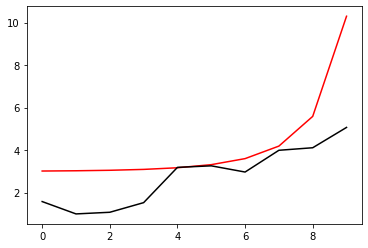

5900 36.290373492645344 -0.7743766423261015 0.9657053307139206
[1.55126465 1.00158882 1.08016244 1.54385436 3.17682053 3.27494669
 2.98822543 3.98205507 4.09500955 5.00792032]


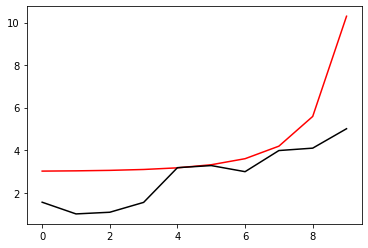

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h, m2_2, lam2).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h, m2_2, lam2).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h, m2_2, lam2).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h, m2_2, lam2).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h, m2_2, lam2).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h, m2_2, lam2).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h, m2_2, lam2).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h, m2_2, lam2).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h, m2_2, lam2).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h, m2_2, lam2).numpy(), m2_2.numpy(), lam2.numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

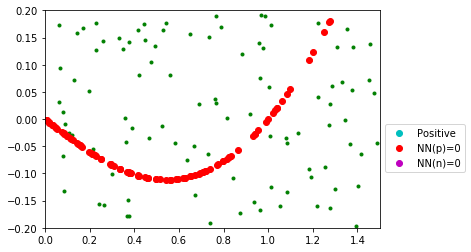

In [54]:
[Positive0, Positive1]=NN_func_01(h, Positive)
[Negative0, Negative1]=NN_func_01(h, Negative)

x_data1=[v[0] for v in Positive0]
y_data1=[v[1] for v in Positive0]
x_data2=[v[0] for v in Positive1]
y_data2=[v[1] for v in Positive1]
x_data3=[v[0] for v in Negative0]
y_data3=[v[1] for v in Negative0]
x_data4=[v[0] for v in Negative1]
y_data4=[v[1] for v in Negative1]
plt.plot(x_data4, y_data4, 'g.')
plt.plot(x_data2, y_data2, 'co', label='Positive')
plt.plot(x_data1, y_data1, 'ro', label='NN(p)=0')
plt.plot(x_data3, y_data3, 'mo', label='NN(n)=0')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()